# Fusão de Dataframes


#### 1 - Carregar Dataframe

In [1]:
import numpy as np
import pandas as pd

df = pd.DataFrame([{'Name': 'Chris', 'Item Purchased': 'Sponge', 'Cost': 22.50},
                   {'Name': 'Kevyn', 'Item Purchased': 'Kitty Litter', 'Cost': 2.50},
                   {'Name': 'Filip', 'Item Purchased': 'Spoon', 'Cost': 5.00}],
                  index=['Store 1', 'Store 1', 'Store 2'])
df

,Name,Item Purchased,Cost
Store 1,Chris,Sponge,22.5
Store 1,Kevyn,Kitty Litter,2.5
Store 2,Filip,Spoon,5.0


#### 2 - Adicionar uma nova coluna (mesmo comprimento)

In [2]:
df['Date'] = ['December 1', 'January 1', 'mid-day']
df

,Name,Item Purchased,Cost,Date
Store 1,Chris,Sponge,22.5,December 1
Store 1,Kevyn,Kitty Litter,2.5,January 1
Store 2,Filip,Spoon,5.0,mid-day


#### 3 - Flag de entraga do produto

In [3]:
df['Deliverd'] = True
df

,Name,Item Purchased,Cost,Date,Deliverd
Store 1,Chris,Sponge,22.5,December 1,True
Store 1,Kevyn,Kitty Litter,2.5,January 1,True
Store 2,Filip,Spoon,5.0,mid-day,True


#### 4 - Fornecer uma lista tão longa quanto o Dataframe

In [4]:
df['Feedback'] = ['Positive', None, 'Negative']
df

,Name,Item Purchased,Cost,Date,Deliverd,Feedback
Store 1,Chris,Sponge,22.5,December 1,True,Positive
Store 1,Kevyn,Kitty Litter,2.5,January 1,True,None
Store 2,Filip,Spoon,5.0,mid-day,True,Negative


#### 5 - Reiniciando índices

In [5]:
adf = df.reset_index()
adf['Date'] = pd.Series({0: 'December 1', 2: 'mid-May'})
adf

,index,Name,Item Purchased,Cost,Date,Deliverd,Feedback
0,Store 1,Chris,Sponge,22.5,December 1,True,Positive
1,Store 1,Kevyn,Kitty Litter,2.5,NaN,True,None
2,Store 2,Filip,Spoon,5.0,mid-May,True,Negative


#### 6 - Criação de dois Dataframes com sobreposição

In [8]:
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR'},
                         {'Name': 'Sally', 'Role': 'Course liasion'},
                         {'Name': 'James', 'Role': 'Grader'}])

staff_df = staff_df.set_index('Name')

student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business'},
                           {'Name': 'Mike', 'School': 'Law'},
                           {'Name': 'Sally', 'School': 'Engineering'}])

student_df = student_df.set_index('Name')


print(staff_df.head())
print()
print(student_df.head())

                 Role
Name                 
Kelly  Director of HR
Sally  Course liasion
James          Grader

            School
Name              
James     Business
Mike           Law
Sally  Engineering


#### 7 - Outer Join

In [9]:
pd.merge(staff_df, student_df, how='outer', left_index=True, right_index=True)

,Role,School
Name,,
James,Grader,Business
Kelly,Director of HR,NaN
Mike,NaN,Law
Sally,Course liasion,Engineering


#### 8 - Inner Join

In [10]:
pd.merge(staff_df, student_df, how='inner', left_index=True, right_index=True)

,Role,School
Name,,
Sally,Course liasion,Engineering
James,Grader,Business


#### 9 - Left Join

In [11]:
pd.merge(staff_df, student_df, how='left', left_index=True, right_index=True)

,Role,School
Name,,
Kelly,Director of HR,NaN
Sally,Course liasion,Engineering
James,Grader,Business


#### 10 - Right Join

In [12]:
pd.merge(staff_df, student_df, how='right', left_index=True, right_index=True)

,Role,School
Name,,
James,Grader,Business
Mike,NaN,Law
Sally,Course liasion,Engineering


#### 11 - Fusão por colunas

In [13]:
staff_df = staff_df.reset_index()
student_df = student_df.reset_index()

pd.merge(staff_df, student_df, how='left', left_on='Name', right_on='Name')

,Name,Role,School
0,Kelly,Director of HR,NaN
1,Sally,Course liasion,Engineering
2,James,Grader,Business


#### 12 - Conflitos

In [14]:
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR', 'Location': 'State Street'},
                         {'Name': 'Sally', 'Role': 'Course liasion', 'Location': 'Washington Avenue'},
                         {'Name': 'James', 'Role': 'Grader', 'Location': 'Washington Avenue'}])

student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business', 'Location': '1024 Billiard Avenue'},
                           {'Name': 'Mike', 'School': 'Law', 'Location': 'Fraternity House #22'},
                           {'Name': 'Sally', 'School': 'Engineering', 'Location': '512 Wilson Crescent'}])

pd.merge(staff_df, student_df, how='left', left_on='Name', right_on='Name')

,Name,Role,Location_x,School,Location_y
0,Kelly,Director of HR,State Street,NaN,NaN
1,Sally,Course liasion,Washington Avenue,Engineering,512 Wilson Crescent
2,James,Grader,Washington Avenue,Business,1024 Billiard Avenue


#### 13 - Multi-Indexação

In [17]:
staff_df = pd.DataFrame([{'First Name': 'Kelly', 'Last Name': 'Desjardins', 'Role': 'Director of HR'},
                         {'First Name': 'Sally', 'Last Name': 'Brooks', 'Role': 'Course liasion'},
                         {'First Name': 'James', 'Last Name': 'Wilde', 'Role': 'Grader'}])

student_df = pd.DataFrame([{'First Name': 'James', 'Last Name': 'Hammond', 'School': 'Business'},
                           {'First Name': 'Mike', 'Last Name': 'Smith', 'School': 'Law'},
                           {'First Name': 'Sally', 'Last Name': 'Brooks', 'School': 'Engineering'}])

# staff_df
# student_df

pd.merge(staff_df, student_df, how='inner', left_on=['First Name','Last Name'], right_on=['First Name','Last Name'])

,First Name,Last Name,Role,School
0,Sally,Brooks,Course liasion,Engineering


# Python & Pandas Idiomáticos

#### 14 - Importar CSV Censo USA

In [39]:
import pandas as pd

df = pd.read_csv('./Data/census.csv')
df.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.002295,-0.193196,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861


#### 15 - Encadeamento de métodos (Idiomático)

In [21]:
(df.where(df['SUMLEV']==50)
    .dropna()
    .set_index(['STNAME','CTYNAME'])
    .rename(columns ={'ESTIMATESBASE2010': 'Estimates Base 2010'}))

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME  CTYNAME                                                      
Alabama Autauga County       50.0     3.0       6.0    1.0     1.0   
        Baldwin County       50.0     3.0       6.0    1.0     3.0   
        Barbour County       50.0     3.0       6.0    1.0     5.0   
        Bibb County          50.0     3.0       6.0    1.0     7.0   
        Blount County        50.0     3.0       6.0    1.0     9.0   
...                           ...     ...       ...    ...     ...   
Wyoming Sweetwater County    50.0     4.0       8.0   56.0    37.0   
        Teton County         50.0     4.0       8.0   56.0    39.0   
        Uinta County         50.0     4.0       8.0   56.0    41.0   
        Washakie County      50.0     4.0       8.0   56.0    43.0   
        Weston County        50.0     4.0       8.0   56.0    45.0   

                           CENSUS2010POP  Estimates Base 2010  \
STNAME  CTYNAME                                                 
Alabama Autauga County           54571.0              54571.0   
        Baldwin County          182265.0             182265.0   
        Barbour County           27457.0              27457.0   
        Bibb County              22915.0              22919.0   
        Blount County            57322.0              57322.0   
...                                  ...                  ...   
Wyoming Sweetwater County        43806.0              43806.0   
        Teton County             21294.0              21294.0   
        Uinta County             21118.0              21118.0   
        Washakie County           8533.0               8533.0   
        Weston County             7208.0               7208.0   

                           POPESTIMATE2010  POPESTIMATE2011  POPESTIMATE2012  \
STNAME  CTYNAME                                                                
Alabama Autauga County             54660.0          55253.0          55175.0   
        Baldwin County            183193.0         186659.0         190396.0   
        Barbour County             27341.0          27226.0          27159.0   
        Bibb County                22861.0          22733.0          22642.0   
        Blount County              57373.0          57711.0          57776.0   
...                                    ...              ...              ...   
Wyoming Sweetwater County          43593.0          44041.0          45104.0   
        Teton County               21297.0          21482.0          21697.0   
        Uinta County               21102.0          20912.0          20989.0   
        Washakie County             8545.0           8469.0           8443.0   
        Weston County               7181.0           7114.0           7065.0   

                           ...  RDOMESTICMIG2011  RDOMESTICMIG2012  \
STNAME  CTYNAME            ...                                       
Alabama Autauga County     ...          7.242091         -2.915927   
        Baldwin County     ...         14.832960         17.647293   
        Barbour County     ...         -4.728132         -2.500690   
        Bibb County        ...         -5.527043         -5.068871   
        Blount County      ...          1.807375         -1.177622   
...                        ...               ...               ...   
Wyoming Sweetwater County  ...          1.072643         16.243199   
        Teton County       ...         -1.589565          0.972695   
        Uinta County       ...        -17.755986         -4.916350   
        Washakie County    ...        -11.637475         -0.827815   
        Weston County      ...        -11.752361         -8.040059   

                           RDOMESTICMIG2013  RDOMESTICMIG2014  \
STNAME  CTYNAME                                                 
Alabama Autauga County            -3.012349          2.265971   
        Baldwin County            21.845705         19.243287   
        Barbour County            -7.056824         -3.904

#### 16 - Forma Tradicional do código anterior

In [22]:
df = df[df['SUMLEV']==50]
df.set_index(['STNAME','CTYNAME'], inplace=True)
df.rename(columns={'ESTIMATESBASE2010': 'Estimates Base 2010'})

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME  CTYNAME                                                      
Alabama Autauga County         50       3         6      1       1   
        Baldwin County         50       3         6      1       3   
        Barbour County         50       3         6      1       5   
        Bibb County            50       3         6      1       7   
        Blount County          50       3         6      1       9   
...                           ...     ...       ...    ...     ...   
Wyoming Sweetwater County      50       4         8     56      37   
        Teton County           50       4         8     56      39   
        Uinta County           50       4         8     56      41   
        Washakie County        50       4         8     56      43   
        Weston County          50       4         8     56      45   

                           CENSUS2010POP  Estimates Base 2010  \
STNAME  CTYNAME                                                 
Alabama Autauga County             54571                54571   
        Baldwin County            182265               182265   
        Barbour County             27457                27457   
        Bibb County                22915                22919   
        Blount County              57322                57322   
...                                  ...                  ...   
Wyoming Sweetwater County          43806                43806   
        Teton County               21294                21294   
        Uinta County               21118                21118   
        Washakie County             8533                 8533   
        Weston County               7208                 7208   

                           POPESTIMATE2010  POPESTIMATE2011  POPESTIMATE2012  \
STNAME  CTYNAME                                                                
Alabama Autauga County               54660            55253            55175   
        Baldwin County              183193           186659           190396   
        Barbour County               27341            27226            27159   
        Bibb County                  22861            22733            22642   
        Blount County                57373            57711            57776   
...                                    ...              ...              ...   
Wyoming Sweetwater County            43593            44041            45104   
        Teton County                 21297            21482            21697   
        Uinta County                 21102            20912            20989   
        Washakie County               8545             8469             8443   
        Weston County                 7181             7114             7065   

                           ...  RDOMESTICMIG2011  RDOMESTICMIG2012  \
STNAME  CTYNAME            ...                                       
Alabama Autauga County     ...          7.242091         -2.915927   
        Baldwin County     ...         14.832960         17.647293   
        Barbour County     ...         -4.728132         -2.500690   
        Bibb County        ...         -5.527043         -5.068871   
        Blount County      ...          1.807375         -1.177622   
...                        ...               ...               ...   
Wyoming Sweetwater County  ...          1.072643         16.243199   
        Teton County       ...         -1.589565          0.972695   
        Uinta County       ...        -17.755986         -4.916350   
        Washakie County    ...        -11.637475         -0.827815   
        Weston County      ...        -11.752361         -8.040059   

                           RDOMESTICMIG2013  RDOMESTICMIG2014  \
STNAME  CTYNAME                                                 
Alabama Autauga County            -3.012349          2.265971   
        Baldwin County            21.845705         19.243287   
        Barbour County            -7.056824         -3.904

#### 17 - Apply and Lambdas

In [23]:
import numpy as np

rows = ['POPESTIMATE2010',
        'POPESTIMATE2011',
        'POPESTIMATE2012',
        'POPESTIMATE2013',
        'POPESTIMATE2014',
        'POPESTIMATE2015']

df.apply(lambda x: np.max(x[rows]), axis=1)

STNAME   CTYNAME          
Alabama  Autauga County        55347.0
         Baldwin County       203709.0
         Barbour County        27341.0
         Bibb County           22861.0
         Blount County         57776.0
                                ...   
Wyoming  Sweetwater County     45162.0
         Teton County          23125.0
         Uinta County          21102.0
         Washakie County        8545.0
         Weston County          7234.0
Length: 3142, dtype: float64

# Função Groupby()

#### 18 - Exclusão da totalização dos estados (==40)

In [25]:
df = df[df['SUMLEV']==50]
df.head()

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME  CTYNAME                                                   
Alabama Autauga County      50       3         6      1       1   
        Baldwin County      50       3         6      1       3   
        Barbour County      50       3         6      1       5   
        Bibb County         50       3         6      1       7   
        Blount County       50       3         6      1       9   

                        CENSUS2010POP  ESTIMATESBASE2010  POPESTIMATE2010  \
STNAME  CTYNAME                                                             
Alabama Autauga County          54571              54571            54660   
        Baldwin County         182265             182265           183193   
        Barbour County          27457              27457            27341   
        Bibb County             22915              22919            22861   
        Blount County           57322              57322            57373   

                        POPESTIMATE2011  POPESTIMATE2012  ...  \
STNAME  CTYNAME                                           ...   
Alabama Autauga County            55253            55175  ...   
        Baldwin County           186659           190396  ...   
        Barbour County            27226            27159  ...   
        Bibb County               22733            22642  ...   
        Blount County             57711            57776  ...   

                        RDOMESTICMIG2011  RDOMESTICMIG2012  RDOMESTICMIG2013  \
STNAME  CTYNAME                                                                
Alabama Autauga County          7.242091         -2.915927         -3.012349   
        Baldwin County         14.832960         17.647293         21.845705   
        Barbour County         -4.728132         -2.500690         -7.056824   
        Bibb County            -5.527043         -5.068871         -6.201001   
        Blount County           1.807375         -1.177622         -1.748766   

                        RDOMESTICMIG2014  RDOMESTICMIG2015  RNETMIG2011  \
STNAME  CTYNAME                                                           
Alabama Autauga County          2.265971         -2.530799     7.606016   
        Baldwin County         19.243287         17.197872    15.844176   
        Barbour County         -3.904217        -10.543299    -4.874741   
        Bibb County            -0.177537          0.177258    -5.088389   
        Blount County          -2.062535         -1.369970     1.859511   

                        RNETMIG2012  RNETMIG2013  RNETMIG2014  RNETMIG2015  
STNAME  CTYNAME                                                             
Alabama Autauga County    -2.626146    -2.722002     2.592270    -2.187333  
        Baldwin County    18.559627    22.727626    20.317142    18.293499  
        Barbour County    -2.758113    -7.167664    -3.978583   -10.543299  
        Bibb County       -4.363636    -5.403729     0.754533     1.107861  
        Blount County     -0.848580    -1.402476    -1.577232    -0.884411  

[5 rows x 98 columns]

#### 19 - Iterar todos os estados e gerar uma lista dos números com a média da população

In [91]:
# %%timeit -n 10

# for state in df['STNAME'].unique():
#     avg = np.average(df.where(df['STNAME']==state).dropna()['CENSUS2010POP'])
#     print('Counties in state ' + state + ' have an average population of ' + str(avg))

#### 20 - Função Groupby()

In [92]:
# %%timeit -n 10

# for group, frame in df.groupby('STNAME'):
#     avg = np.average(frame['CENSUS2010POP'])
#     print('Counties in state ' + group + ' have an average population of ' + str(avg))

#### 21 - Método agg() - construir um data frame sumário, com a população média por Estado

In [34]:
df.groupby('STNAME').agg({'CENSUS2010POP': np.average})

,CENSUS2010POP
STNAME,
Alabama,1.405805e+05
Alaska,4.734873e+04
Arizona,7.990021e+05
Arkansas,7.673468e+04
California,1.262846e+06
Colorado,1.547445e+05
Connecticut,7.942438e+05
Delaware,4.489670e+05
District of Columbia,6.017230e+05


#### 22 - Função Groupby (Série vs. Dataframe)

In [40]:
print(type(df.groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011']))
print(type(df.groupby(level=0)['POPESTIMATE2010']))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>
<class 'pandas.core.groupby.generic.SeriesGroupBy'>


/var/folders/01/_r7b02r11p15j0s54gb9x0040000gn/T/ipykernel_3089/817127102.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(type(df.groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011']))


#### 23 - Na Série

In [46]:
(df.set_index('STNAME').groupby(level=0)['CENSUS2010POP'].agg(avg='mean', soma='sum'))

,avg,soma
STNAME,,
Alabama,1.405805e+05,9559472
Alaska,4.734873e+04,1420462
Arizona,7.990021e+05,12784034
Arkansas,7.673468e+04,5831836
California,1.262846e+06,74507912
Colorado,1.547445e+05,10058392
Connecticut,7.942438e+05,7148194
Delaware,4.489670e+05,1795868
District of Columbia,6.017230e+05,1203446


#### 24 - No Dataframe

In [55]:
(df.set_index('STNAME').groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011'].agg(['mean', 'sum']))

# df.set_index('STNAME').groupby(level=0)[['POPESTIMATE2010','POPESTIMATE2011']]
#     .agg({"POPESTIMATE2010": [np.mean, np.sum], "POPESTIMATE2011": [np.mean, np.sum]})

/var/folders/01/_r7b02r11p15j0s54gb9x0040000gn/T/ipykernel_3089/596025003.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  (df.set_index('STNAME').groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011'].agg(['mean', 'sum']))


POPESTIMATE2010           POPESTIMATE2011          
                                mean       sum            mean       sum
STNAME                                                                  
Alabama                 1.407400e+05   9570322    1.412091e+05   9602216
Alaska                  4.760140e+04   1428042    4.818133e+04   1445440
Arizona                 8.010260e+05  12816416    8.085915e+05  12937464
Arkansas                7.690511e+04   5844788    7.732995e+04   5877076
California              1.265562e+06  74668158    1.277967e+06  75400068
Colorado                1.553309e+05  10096508    1.575225e+05  10238960
Connecticut             7.954927e+05   7159434    7.977242e+05   7179518
Delaware                4.498955e+05   1799582    4.539580e+05   1815832
District of Columbia    6.051260e+05   1210252    6.204720e+05   1240944
Florida                 5.544085e+05  37699780    5.619274e+05  38211066
Georgia                 1.214182e+05  19426908    1.226535e+05  19624560
Hawaii                  4.546600e+05   2727960    4.594090e+05   2756454
Idaho                   6.982160e+04   3141972    7.040596e+04   3168268
Illinois                2.493446e+05  25682498    2.497453e+05  25723764
Indiana                 1.395826e+05  12981180    1.401472e+05  13033690
Iowa                    6.101388e+04   6101388    6.130778e+04   6130778
Kansas                  5.394008e+04   5717648    5.414938e+04   5739834
Kentucky                7.186673e+04   8695874    7.219640e+04   8735764
Louisiana               1.398446e+05   9089902    1.407810e+05   9150762
Maine                   1.561994e+05   2655390    1.562655e+05   2656514
Maryland                4.630727e+05  11576818    4.675337e+05  11688342
Massachusetts           8.753381e+05  13130072    8.815729e+05  13223594
Michigan                2.351755e+05  19754738    2.351569e+05  19753178
Minnesota               1.207023e+05  10621806    1.215482e+05  10696238
Mississippi             7.157388e+04   5940632    7.175901e+04   5955998
Missouri                1.033802e+05  11992104    1.036308e+05  12021174
Montana                 3.475940e+04   1981286    3.500863e+04   1995492
Nebraska                3.893670e+04   3660050    3.919964e+04   3684766
Nevada                  3.003822e+05   5406880    3.020910e+05   5437638
New Hampshire           2.394015e+05   2633416    2.396989e+05   2636688
New Jersey              8.003528e+05  17607762    8.039031e+05  17685868
New Mexico              1.214554e+05   4129482    1.222486e+05   4156452
New York                6.159657e+05  38805840    6.197842e+05  39046404
North Carolina          1.892867e+05  19117958    1.911094e+05  19302050
North Dakota            2.498259e+04   1349060    2.538244e+04   1370652
Ohio                    2.593431e+05  23081532    2.594481e+05  23090884
Oklahoma                9.639990e+04   7519192    9.709297e+04   7573252
Oregon                  2.074579e+05   7675944    2.091086e+05   7737018
Pennsylvania            3.738828e+05  25424028    3.748589e+05  25490404
Rhode Island            3.510730e+05   2106438    3.506187e+05   2103712
South Carolina          1.972721e+05   9271788    1.988397e+05   9345466
South Dakota            2.436713e+04   1632598    2.460564e+04   1648578
Tennessee               1.324289e+05  12713170    1.333002e+05  12796816
Texas                   1.979950e+05  50488726    2.012115e+05  51308928
Utah                    1.850284e+05   5550852    1.877627e+05   5632880
Vermont                 8.346453e+04   1251968    8.355827e+04   1253374
Virginia                1.197879e+05  16051574    1.210565e+05  16221566
Washington              3.371530e+05  13486120    3.411615e+05  13646458
West Virginia           6.622232e+04   3708450    6.624814e+04   3709896
Wisconsin               1.558960e+05  11380408    1.564307e+05  11419440
Wyoming                 4.704300e+04   1129032    4.731400e+04   1135536

#### 25 - Comportamento não esperado dada a mudança de rotulagem

In [37]:
(df.set_index('STNAME').groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011']
    .agg({'POPESTIMATE2010': np.average, 'POPESTIMATE2011': np.sum}))

/var/folders/01/_r7b02r11p15j0s54gb9x0040000gn/T/ipykernel_3089/1219683218.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  (df.set_index('STNAME').groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011']


,POPESTIMATE2010,POPESTIMATE2011
STNAME,,
Alabama,1.407400e+05,9602216
Alaska,4.760140e+04,1445440
Arizona,8.010260e+05,12937464
Arkansas,7.690511e+04,5877076
California,1.265562e+06,75400068
Colorado,1.553309e+05,10238960
Connecticut,7.954927e+05,7179518
Delaware,4.498955e+05,1815832
District of Columbia,6.051260e+05,1240944


# Tabelas Pivot

#### 26 - Carregar conjunto de dados "car.csv"

In [56]:
df = pd.read_csv('./Data/cars.csv')

In [57]:
df.head()

,YEAR,Make,Model,Size,(kW),Unnamed: 5,TYPE,CITY (kWh/100 km),HWY (kWh/100 km),COMB (kWh/100 km),CITY (Le/100 km),HWY (Le/100 km),COMB (Le/100 km),(g/km),RATING,(km),TIME (h)
0,2012,MITSUBISHI,i-MiEV,SUBCOMPACT,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,NaN,100,7
1,2012,NISSAN,LEAF,MID-SIZE,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,NaN,117,7
2,2013,FORD,FOCUS ELECTRIC,COMPACT,107,A1,B,19.0,21.1,20.0,2.1,2.4,2.2,0,NaN,122,4
3,2013,MITSUBISHI,i-MiEV,SUBCOMPACT,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,NaN,100,7
4,2013,NISSAN,LEAF,MID-SIZE,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,NaN,117,7


#### 27 - Comparação da marca de veículos elétricos contra os anos e fazer essa comparação em termos de capacidade da bateria

In [58]:
df.pivot_table(values='(kW)', index='YEAR', columns='Make', aggfunc=np.mean)

Make,BMW,CHEVROLET,FORD,KIA,MITSUBISHI,NISSAN,SMART,TESLA
YEAR,,,,,,,,
2012,NaN,NaN,NaN,NaN,49.0,80.0,NaN,NaN
2013,NaN,NaN,107.0,NaN,49.0,80.0,35.0,280.000000
2014,NaN,104.0,107.0,NaN,49.0,80.0,35.0,268.333333
2015,125.0,104.0,107.0,81.0,49.0,80.0,35.0,320.666667
2016,125.0,104.0,107.0,81.0,49.0,80.0,35.0,409.700000


#### 28 - Lista de funções diferentes para aplicar

In [59]:
df.pivot_table(values='(kW)', index='YEAR', columns='Make', aggfunc=[np.mean,np.min], margins=True)

mean                                                             \
Make    BMW CHEVROLET   FORD   KIA MITSUBISHI NISSAN SMART       TESLA   
YEAR                                                                     
2012    NaN       NaN    NaN   NaN       49.0   80.0   NaN         NaN   
2013    NaN       NaN  107.0   NaN       49.0   80.0  35.0  280.000000   
2014    NaN     104.0  107.0   NaN       49.0   80.0  35.0  268.333333   
2015  125.0     104.0  107.0  81.0       49.0   80.0  35.0  320.666667   
2016  125.0     104.0  107.0  81.0       49.0   80.0  35.0  409.700000   
All   125.0     104.0  107.0  81.0       49.0   80.0  35.0  345.478261   

                   amin                                                        \
Make         All    BMW CHEVROLET   FORD   KIA MITSUBISHI NISSAN SMART  TESLA   
YEAR                                                                            
2012   64.500000    NaN       NaN    NaN   NaN       49.0   80.0   NaN    NaN   
2013  158.444444    NaN       NaN  107.0   NaN       49.0   80.0  35.0  270.0   
2014  135.000000    NaN     104.0  107.0   NaN       49.0   80.0  35.0  225.0   
2015  181.428571  125.0     104.0  107.0  81.0       49.0   80.0  35.0  280.0   
2016  252.263158  125.0     104.0  107.0  81.0       49.0   80.0  35.0  283.0   
All   190.622642  125.0     104.0  107.0  81.0       49.0   80.0  35.0  225.0   

          
Make All  
YEAR      
2012  49  
2013  35  
2014  35  
2015  35  
2016  35  
All   35

# Datas no Pandas

#### 29 - Timestamp

In [60]:
pd.Timestamp('9/1/2017 10:05AM')

Timestamp('2017-09-01 10:05:00')

#### 30 - Period

In [61]:
pd.Period('1/2017')

Period('2017-01', 'M')

In [62]:
pd.Period('3/1/2017')

Period('2017-03-01', 'D')

#### 31 - DatetimeIndex

In [63]:
t1 = pd.Series(list('abc'), [pd.Timestamp('2016-09-01'), pd.Timestamp('2016-09-02'), pd.Timestamp('2016-09-03')])
t1

2016-09-01    a
2016-09-02    b
2016-09-03    c
dtype: object

#### 32 - Tipo da série

In [64]:
type(t1.index)

pandas.core.indexes.datetimes.DatetimeIndex

#### 33 - PeriodIndex

In [65]:
t2 = pd.Series(list('def'), [pd.Period('2016-09'), pd.Period('2016-10'), pd.Period('2016-11')])
t2

2016-09    d
2016-10    e
2016-11    f
Freq: M, dtype: object

In [66]:
type(t2.index)

pandas.core.indexes.period.PeriodIndex

#### 34 - Novo DataFrame para conversão  to_datetime()

In [69]:
d1 = ['2 June 2013', 'Aug 29, 2014', '2015-06-26', '7/12/16']

ts3 = pd.DataFrame(np.random.randint(10, 100, (4,2)), index=d1, columns=list('ab'))
ts3

,a,b
2 June 2013,27,51
"Aug 29, 2014",93,27
2015-06-26,47,34
7/12/16,15,24


#### 35 - Usando to_datetime()

In [70]:
ts3.index = pd.to_datetime(ts3.index)
ts3

,a,b
2013-06-02,27,51
2014-08-29,93,27
2015-06-26,47,34
2016-07-12,15,24


#### 36 - Data no formato Europeu

In [73]:
pd.to_datetime('4.7.12', dayfirst=True)

Timestamp('2012-07-04 00:00:00')

#### 37 - Timedeltas

In [75]:
pd.Timestamp('9/3/2016') - pd.Timestamp('9/1/2016')

Timedelta('2 days 00:00:00')

#### 38 - Encontrar datas e horas com Timedeltas

In [76]:
pd.Timestamp('9/2/2016 8:10AM') + pd.Timedelta('12D 3H')

Timestamp('2016-09-14 11:10:00')

#### 39 - Método date_range()

In [77]:
dates = pd.date_range('10-01-2016', periods=9, freq='2W-SUN')
dates

DatetimeIndex(['2016-10-02', '2016-10-16', '2016-10-30', '2016-11-13',
               '2016-11-27', '2016-12-11', '2016-12-25', '2017-01-08',
               '2017-01-22'],
              dtype='datetime64[ns]', freq='2W-SUN')

#### 40 - Introduzindo datas aleatórias

In [78]:
df = pd.DataFrame({'Count 1': 100 + np.random.randint(-5, 10, 9).cumsum(),
                  'Count 2': 120 + np.random.randint(-5, 10, 9)}, index=dates)
df

,Count 1,Count 2
2016-10-02,105,119
2016-10-16,106,115
2016-10-30,108,122
2016-11-13,114,117
2016-11-27,112,120
2016-12-11,121,115
2016-12-25,122,123
2017-01-08,119,127
2017-01-22,115,127


#### 41 - Podemos verificar qual o dia da semana

In [80]:
df.index.day_name

<bound method inherit_from_data.<locals>.method of DatetimeIndex(['2016-10-02', '2016-10-16', '2016-10-30', '2016-11-13',
               '2016-11-27', '2016-12-11', '2016-12-25', '2017-01-08',
               '2017-01-22'],
              dtype='datetime64[ns]', freq='2W-SUN')>

#### 42 - Diferença entre datas

In [81]:
df.diff()

,Count 1,Count 2
2016-10-02,NaN,NaN
2016-10-16,1.0,-4.0
2016-10-30,2.0,7.0
2016-11-13,6.0,-5.0
2016-11-27,-2.0,3.0
2016-12-11,9.0,-5.0
2016-12-25,1.0,8.0
2017-01-08,-3.0,4.0
2017-01-22,-4.0,0.0


#### 43 - Função resample()

In [82]:
df.resample('M').mean()

,Count 1,Count 2
2016-10-31,106.333333,118.666667
2016-11-30,113.000000,118.500000
2016-12-31,121.500000,119.000000
2017-01-31,117.000000,127.000000


#### 44 - Indexação parcial em datas

In [84]:
df.loc['2017']

,Count 1,Count 2
2017-01-08,119,127
2017-01-22,115,127


In [85]:
df.loc['2016-12']

,Count 1,Count 2
2016-12-11,121,115
2016-12-25,122,123


In [86]:
df.loc['2016-12':]

,Count 1,Count 2
2016-12-11,121,115
2016-12-25,122,123
2017-01-08,119,127
2017-01-22,115,127


#### 45 - Preenchendo valores ausentes

In [87]:
df.asfreq('W', method='ffill')

,Count 1,Count 2
2016-10-02,105,119
2016-10-09,105,119
2016-10-16,106,115
2016-10-23,106,115
2016-10-30,108,122
2016-11-06,108,122
2016-11-13,114,117
2016-11-20,114,117
2016-11-27,112,120
2016-12-04,112,120


#### 46 - Plotando

<AxesSubplot:>

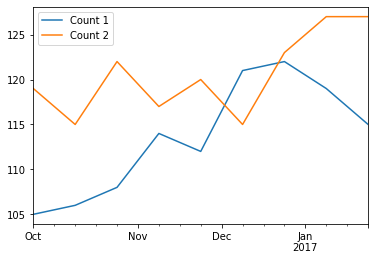

In [88]:
import matplotlib.pyplot as plt
%matplotlib inline

df.plot()